In [246]:

#import the data
import pandas as pd

file_path = 'C:/Users/sisni/trajec_v1.txt'
trajec = pd.read_csv(file_path, delim_whitespace=True)
file_path2 = 'C:/Users/sisni/resultados_trajec_v2.txt'
trajec2 = pd.read_csv(file_path2, delim_whitespace=True)

In [247]:
#we only extract 8minutes of video and delete some particles that are counted by error
trajec_8min=trajec[(trajec['frame']<14400) & (trajec['particle']<52)]
trajec2_8min=trajec2[(trajec2['frame']<14400) & (trajec2['particle']<53) & (trajec2['particle'] != 0)]


200.24503412082078 pixels


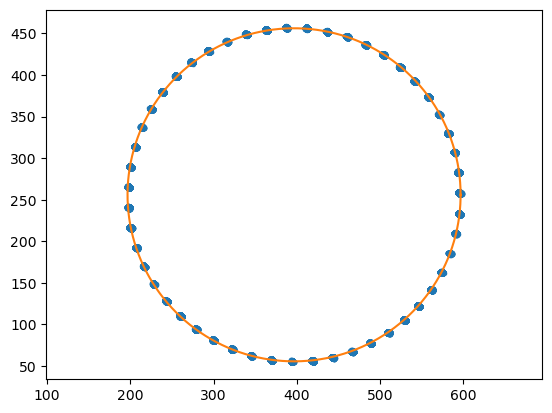

In [248]:
import skg
import numpy as np
import matplotlib.pyplot as plt
x_coords = trajec_8min['x']
y_coords = trajec_8min['y']

#to not contabilize a particle in the center that does not appear we do the following
arr1 = (np.array(x_coords)<500) & (np.array(x_coords)>300) 
arr2 = (np.array(y_coords)<300) & (np.array(y_coords)>200) 
arr3 = np.logical_and(arr1,arr2)

x_coords = x_coords[np.logical_not(arr3)]
y_coords = y_coords[np.logical_not(arr3)]

#we fit a circle to the data
data = list(zip(x_coords, y_coords))
radious, center = skg.nsphere_fit(data)
t = np.linspace(0, 2 * np.pi, 1000, endpoint=True)
print(radious, "pixels")
plt.plot(*np.array(data).T,'.')
plt.plot(radious * np.cos(t) + center[0], radious * np.sin(t) + center[1])
plt.axis('equal')
plt.show()

In [249]:
#calculate the center as the mean due to its circular symmetry
center_x=np.mean(x_coords)
center_y=np.mean(y_coords)
print(center_x, "pixels", center_y, "pixels")

396.99681165467393 pixels 255.7829130531731 pixels


deprecated pixel format used, make sure you did set range correctly


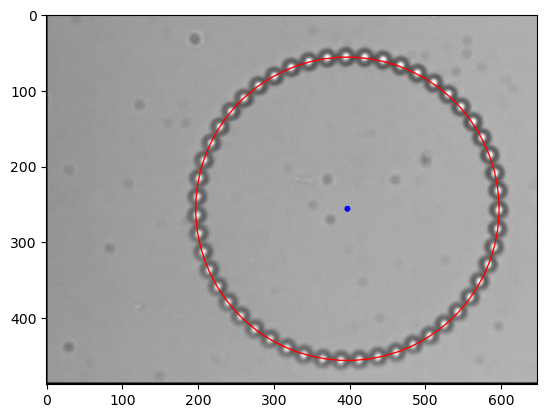

In [250]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import pims
import trackpy as tp # http://soft-matter.github.io/trackpy/v0.5.0/tutorial/walkthrough.html
import os.path as path
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
import pandas as pd
@pims.pipeline
#define the brightness threshold and remove small objects and define a closure sorrounding particles
def select_bright_centers(image):
    tresh = 130
    image=image<tresh
    image = ski.morphology.remove_small_objects(image,min_size=140)
    image=ski.morphology.isotropic_closing(image,3)
    image = ski.morphology.flood_fill(image,(0,0),False)
    image = ski.morphology.flood_fill(image,(0,0),True)
    image=~image
    return image
fname = "1_2024_03_11_12_36_43.avi"
datadir = "C:/Users/sisni/Downloads"
rawframes = pims.as_grey( pims.PyAVVideoReader( path.join(datadir, fname)) )
frames = select_bright_centers(rawframes)
# Plot 
plt.imshow(rawframes[1], cmap="gray")
#define the circle and the centre
circle = Circle((center_x, center_y), radious, color='red', fill=False)
center_circle = Circle((center_x, center_y), 3, color='blue')

plt.gca().add_patch(circle)
plt.gca().add_patch(center_circle)
plt.show()

In [251]:
#define the r and theta cordinates
trajec_8min['r']=np.sqrt((x_coords-center_x)**2 + (y_coords-center_y)**2)
trajec_8min['theta']=np.arctan2(trajec_8min['y'],trajec_8min['x'])
trajec_8min

C:\Users\sisni\AppData\Local\Temp\ipykernel_2272\2856656176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajec_8min['r']=np.sqrt((x_coords-center_x)**2 + (y_coords-center_y)**2)
C:\Users\sisni\AppData\Local\Temp\ipykernel_2272\2856656176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajec_8min['theta']=np.arctan2(trajec_8min['y'],trajec_8min['x'])


,x,y,frame,particle,r,theta
0,395.323529,55.176471,0.0,0.0,200.613420,0.138677
1,395.244898,55.622449,1.0,0.0,200.168131,0.139811
2,394.979798,55.222222,2.0,0.0,200.570833,0.138910
3,395.106796,55.378641,3.0,0.0,200.413184,0.139254
4,394.801980,54.574257,4.0,0.0,201.220627,0.137361
...,...,...,...,...,...,...
2697580,258.801980,110.574257,14395.0,51.0,200.457889,0.403779
2697581,258.604167,110.447917,14396.0,51.0,200.685787,0.403642
2697582,258.927835,110.731959,14397.0,51.0,200.256889,0.404118
2697583,258.395604,110.637363,14398.0,51.0,200.692614,0.404553


178.73430599668092 pixels


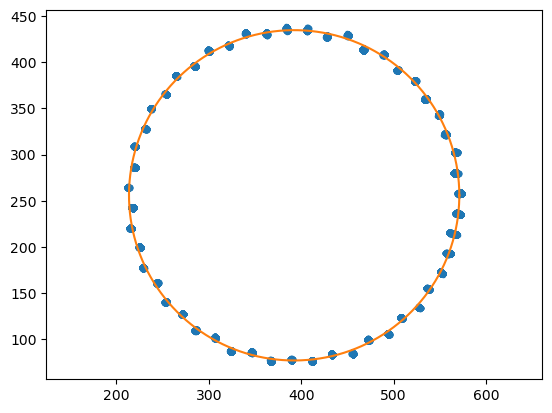

In [252]:

#I do the same for the second video

import skg
import matplotlib.pyplot as plt
import numpy as np
x_coords2 = trajec2_8min['x']
y_coords2 = trajec2_8min['y']

arr1 = (np.array(x_coords2)<500) & (np.array(x_coords2)>300) 
arr2 = (np.array(y_coords2)<300) & (np.array(y_coords2)>200) 
arr3 = np.logical_and(arr1,arr2)

x_coords2 = x_coords2[np.logical_not(arr3)]
y_coords2 = y_coords2[np.logical_not(arr3)]

data = list(zip(x_coords2, y_coords2))
radious2, center = skg.nsphere_fit(data)
t = np.linspace(0, 2 * np.pi, 1000, endpoint=True)
print(radious2, "pixels")
plt.plot(*np.array(data).T,'.')
plt.plot(radious2 * np.cos(t) + center[0], radious2 * np.sin(t) + center[1])
plt.axis('equal')
plt.show()

In [253]:
center2_x=np.mean(x_coords2)
center2_y=np.mean(y_coords2)
print(center2_x, "pixels",center2_y, "pixels")

392.30686541258467 pixels 255.8111536986724 pixels


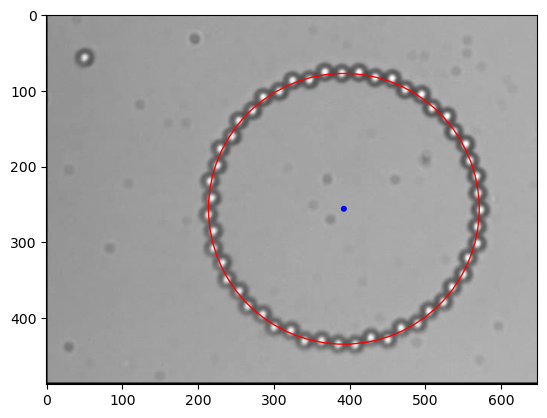

In [254]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import pims
import trackpy as tp # http://soft-matter.github.io/trackpy/v0.5.0/tutorial/walkthrough.html
import os.path as path
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
import pandas as pd
@pims.pipeline
def select_bright_centers(image):
    tresh = 130
    image=image<tresh
    image = ski.morphology.remove_small_objects(image,min_size=140)
    image=ski.morphology.isotropic_closing(image,3)
    image = ski.morphology.flood_fill(image,(0,0),False)
    image = ski.morphology.flood_fill(image,(0,0),True)
    image=~image
    return image
fname = "1_2024_03_11_13_14_26.avi"
datadir = "C:/Users/sisni/Downloads"
rawframes = pims.as_grey( pims.PyAVVideoReader( path.join(datadir, fname)) )
frames = select_bright_centers(rawframes)
# Plot 
plt.imshow(rawframes[1], cmap="gray")

circle = Circle((center2_x, center2_y), radious2, color='red', fill=False)
center_circle = Circle((center2_x, center2_y), 3, color='blue')

plt.gca().add_patch(circle)
plt.gca().add_patch(center_circle)
plt.show()

In [255]:
trajec2_8min['r']=np.sqrt((x_coords2-center2_x)**2 + (y_coords2-center2_y)**2)
trajec2_8min['theta']=np.arctan2(trajec2_8min['y'],trajec2_8min['x'])

trajec2_8min

C:\Users\sisni\AppData\Local\Temp\ipykernel_2272\3389380577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajec2_8min['r']=np.sqrt((x_coords2-center2_x)**2 + (y_coords2-center2_y)**2)
C:\Users\sisni\AppData\Local\Temp\ipykernel_2272\3389380577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajec2_8min['theta']=np.arctan2(trajec2_8min['y'],trajec2_8min['x'])


,x,y,frame,particle,r,theta
602,568.529412,280.205882,0.0,1.0,177.903032,0.457920
603,568.747573,280.000000,1.0,1.0,178.091054,0.457477
604,568.373737,280.252525,2.0,1.0,177.755236,0.458095
605,567.961905,279.895238,3.0,1.0,177.298438,0.457876
606,567.878505,279.841121,4.0,1.0,177.208465,0.457858
...,...,...,...,...,...,...
2791029,507.168421,124.210526,14395.0,52.0,174.676564,0.240182
2791030,506.979798,124.222222,14396.0,52.0,174.543772,0.240290
2791031,507.500000,123.500000,14397.0,52.0,175.430042,0.238710
2791032,507.838384,123.676768,14398.0,52.0,175.519309,0.238885


<function matplotlib.pyplot.show(close=None, block=None)>

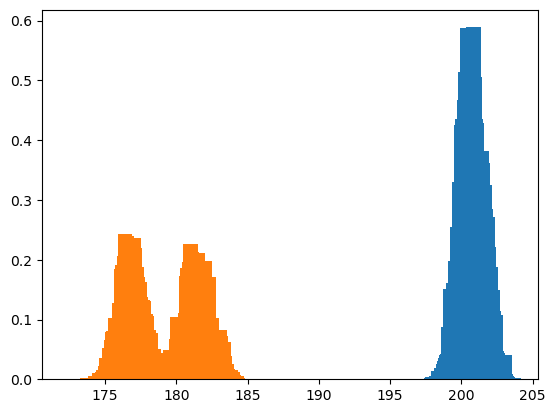

In [256]:
#we plot the data to see which r values we consider in each situation
plt.hist(trajec_8min['r'],bins='auto',width=1,density=True)
plt.hist(trajec2_8min['r'],bins='auto',width=1,density=True)
plt.show

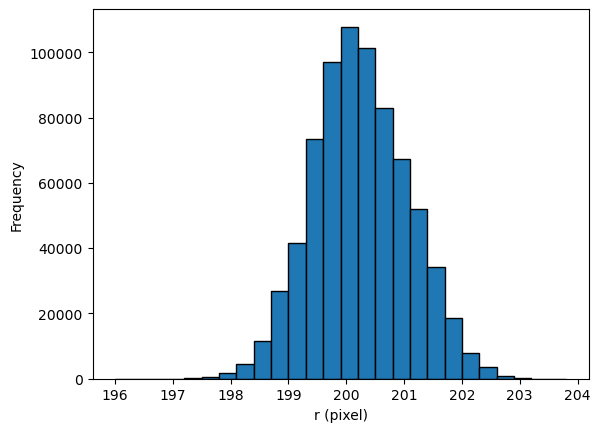

In [257]:
#we plot the data in the right r range
bin_edges = np.arange(196, 204,0.3)
frequencies, _ = np.histogram(trajec_8min['r'], bins=bin_edges)


plt.bar(bin_edges[:-1], frequencies, width=0.3, align='edge', edgecolor='black')
plt.xlabel('r (pixel)')
plt.ylabel('Frequency')
plt.show()

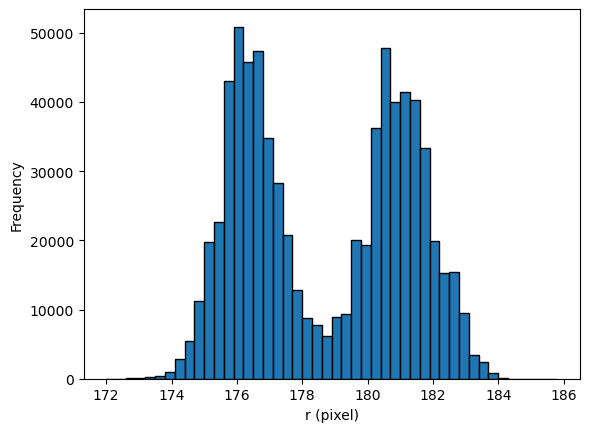

In [258]:
#plot in the right r range for second video
bin_edges2 = np.arange(172, 186 ,0.3)
frequencies2, _ = np.histogram(trajec2_8min['r'], bins=bin_edges2)

plt.bar(bin_edges2[:-1], frequencies2, width=0.3, align='edge', edgecolor='black')
plt.xlabel('r (pixel)')
plt.ylabel('Frequency')
plt.show()

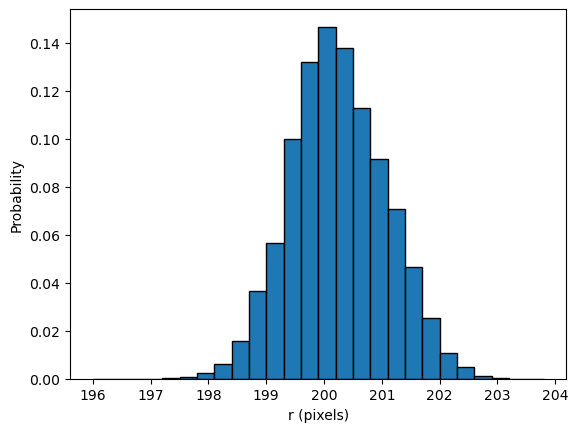

In [259]:
#normalize the frequency that is the same as the probability
total_frequency = np.sum(frequencies)
relative_frequencies = frequencies / total_frequency

plt.bar(bin_edges[:-1], relative_frequencies, width=0.3, align='edge',edgecolor='black')
plt.xlabel('r (pixels)')
plt.ylabel('Probability')
plt.show()

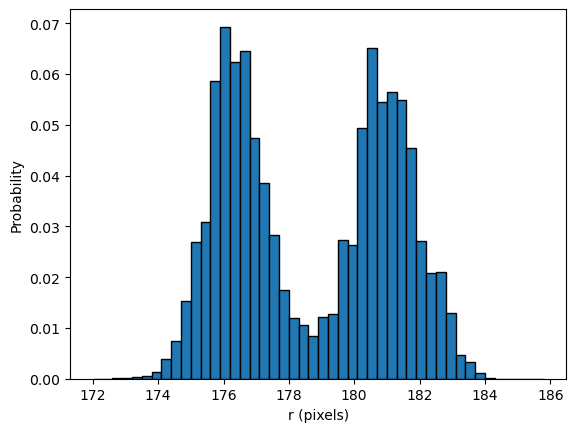

In [260]:
#same for video 2
total_frequency2 = np.sum(frequencies2)
relative_frequencies2 = frequencies2 / total_frequency2

plt.bar(bin_edges2[:-1], relative_frequencies2, width=0.3, align='edge',edgecolor='black')
plt.xlabel('r (pixels)')
plt.ylabel('Probability')
plt.show()

In [261]:
#calculate the roughening at the end of the video (8min) for both videos
mean_r = trajec_8min.groupby('particle')['r'].mean()
h=mean_r-radious
w=np.sum(h**2)/51

mean_r2 = trajec2_8min.groupby('particle')['r'].mean()
h2=mean_r2-radious2
w2=np.sum(h2**2)/51


In [262]:
#for video 1 we do the same calculation but every one minute so we can create an array of the roughening to see its evolution
trajec_7min=trajec[(trajec['frame']<12600) & (trajec['particle']<52)]
trajec_6min=trajec[(trajec['frame']<10800) & (trajec['particle']<52)]
trajec_5min=trajec[(trajec['frame']<9000) & (trajec['particle']<52)]
trajec_4min=trajec[(trajec['frame']<7200) & (trajec['particle']<52)]
trajec_3min=trajec[(trajec['frame']<5400) & (trajec['particle']<52)]
trajec_2min=trajec[(trajec['frame']<3600) & (trajec['particle']<52)]
trajec_1min=trajec[(trajec['frame']<1800) & (trajec['particle']<52)]
trajec_0min=trajec[(trajec['frame']<2) & (trajec['particle']<52)]

#r min 0
x_coords0min = trajec_0min['x']
y_coords0min = trajec_0min['y']

arr1 = (np.array(x_coords0min)<500) & (np.array(x_coords0min)>300) 
arr2 = (np.array(y_coords0min)<300) & (np.array(y_coords0min)>200) 
arr3 = np.logical_and(arr1,arr2)

x_coords0min = x_coords0min[np.logical_not(arr3)]
y_coords0min = y_coords0min[np.logical_not(arr3)]
trajec_0min['r']=np.sqrt((x_coords0min-center_x)**2 + (y_coords0min-center_y)**2)


#r min 7
x_coords7min = trajec_7min['x']
y_coords7min = trajec_7min['y']

arr1 = (np.array(x_coords7min)<500) & (np.array(x_coords7min)>300) 
arr2 = (np.array(y_coords7min)<300) & (np.array(y_coords7min)>200) 
arr3 = np.logical_and(arr1,arr2)

x_coords7min = x_coords7min[np.logical_not(arr3)]
y_coords7min = y_coords7min[np.logical_not(arr3)]
trajec_7min['r']=np.sqrt((x_coords7min-center_x)**2 + (y_coords7min-center_y)**2)

#r min 6
x_coords6min = trajec_6min['x']
y_coords6min = trajec_6min['y']

arr1 = (np.array(x_coords6min)<500) & (np.array(x_coords6min)>300) 
arr2 = (np.array(y_coords6min)<300) & (np.array(y_coords6min)>200) 
arr3 = np.logical_and(arr1,arr2)

x_coords6min = x_coords6min[np.logical_not(arr3)]
y_coords6min = y_coords6min[np.logical_not(arr3)]
trajec_6min['r']=np.sqrt((x_coords6min-center_x)**2 + (y_coords6min-center_y)**2)

#r min 5
x_coords5min = trajec_5min['x']
y_coords5min = trajec_5min['y']

arr1 = (np.array(x_coords5min)<500) & (np.array(x_coords5min)>300) 
arr2 = (np.array(y_coords5min)<300) & (np.array(y_coords5min)>200) 
arr3 = np.logical_and(arr1,arr2)

x_coords5min = x_coords5min[np.logical_not(arr3)]
y_coords5min = y_coords5min[np.logical_not(arr3)]
trajec_5min['r']=np.sqrt((x_coords5min-center_x)**2 + (y_coords5min-center_y)**2)

#r min 4

x_coords4min = trajec_4min['x']
y_coords4min = trajec_4min['y']

arr1 = (np.array(x_coords4min)<500) & (np.array(x_coords4min)>300) 
arr2 = (np.array(y_coords4min)<300) & (np.array(y_coords4min)>200) 
arr3 = np.logical_and(arr1,arr2)

x_coords4min = x_coords4min[np.logical_not(arr3)]
y_coords4min = y_coords4min[np.logical_not(arr3)]
trajec_4min['r']=np.sqrt((x_coords4min-center_x)**2 + (y_coords4min-center_y)**2)

#r min 3

x_coords3min = trajec_3min['x']
y_coords3min = trajec_3min['y']

arr1 = (np.array(x_coords3min)<500) & (np.array(x_coords3min)>300) 
arr2 = (np.array(y_coords3min)<300) & (np.array(y_coords3min)>200) 
arr3 = np.logical_and(arr1,arr2)

x_coords3min = x_coords3min[np.logical_not(arr3)]
y_coords3min = y_coords3min[np.logical_not(arr3)]
trajec_3min['r']=np.sqrt((x_coords3min-center_x)**2 + (y_coords3min-center_y)**2)

#r min 2

x_coords2min = trajec_2min['x']
y_coords2min = trajec_2min['y']

arr1 = (np.array(x_coords2min)<500) & (np.array(x_coords2min)>300) 
arr2 = (np.array(y_coords2min)<300) & (np.array(y_coords2min)>200) 
arr3 = np.logical_and(arr1,arr2)

x_coords2min = x_coords2min[np.logical_not(arr3)]
y_coords2min = y_coords2min[np.logical_not(arr3)]
trajec_2min['r']=np.sqrt((x_coords2min-center_x)**2 + (y_coords2min-center_y)**2)

#r min 1

x_coords1min = trajec_1min['x']
y_coords1min = trajec_1min['y']

arr1 = (np.array(x_coords1min)<500) & (np.array(x_coords1min)>300) 
arr2 = (np.array(y_coords1min)<300) & (np.array(y_coords1min)>200) 
arr3 = np.logical_and(arr1,arr2)

x_coords1min = x_coords1min[np.logical_not(arr3)]
y_coords1min = y_coords1min[np.logical_not(arr3)]
trajec_1min['r']=np.sqrt((x_coords1min-center_x)**2 + (y_coords1min-center_y)**2)

#calculos roughening
mean_r0min = trajec_0min.groupby('particle')['r'].mean()
h_0min=mean_r0min-radious
w_0min=np.sum(h_0min**2)/51

mean_r7min = trajec_7min.groupby('particle')['r'].mean()
h_7min=mean_r7min-radious
w_7min=np.sum(h_7min**2)/51

mean_r6min = trajec_6min.groupby('particle')['r'].mean()
h_6min=mean_r6min-radious
w_6min=np.sum(h_6min**2)/51

mean_r5min = trajec_5min.groupby('particle')['r'].mean()
h_5min=mean_r5min-radious
w_5min=np.sum(h_5min**2)/51

mean_r4min = trajec_4min.groupby('particle')['r'].mean()
h_4min=mean_r4min-radious
w_4min=np.sum(h_4min**2)/51

mean_r3min = trajec_3min.groupby('particle')['r'].mean()
h_3min=mean_r3min-radious
w_3min=np.sum(h_3min**2)/51

mean_r2min = trajec_2min.groupby('particle')['r'].mean()
h_2min=mean_r2min-radious
w_2min=np.sum(h_2min**2)/51

mean_r1min = trajec_1min.groupby('particle')['r'].mean()
h_1min=mean_r1min-radious
w_1min=np.sum(h_1min**2)/51

array_w=np.array([w_0min,w_1min,w_2min,w_3min,w_4min,w_5min,w_6min,w_7min,w])
print(array_w)


C:\Users\sisni\AppData\Local\Temp\ipykernel_2272\4258881818.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajec_0min['r']=np.sqrt((x_coords0min-center_x)**2 + (y_coords0min-center_y)**2)
C:\Users\sisni\AppData\Local\Temp\ipykernel_2272\4258881818.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajec_7min['r']=np.sqrt((x_coords7min-center_x)**2 + (y_coords7min-center_y)**2)
C:\Users\sisni\AppData\Local\Temp\ipykernel_2272\4258881818.py:46: SettingWithCopyWarning: 
A value is trying to be set on

[0.52382289 0.59602681 0.51798507 0.4708531  0.42417389 0.38715427
 0.36639004 0.36420675 0.3809322 ]


In [263]:
#same for video 2

trajec2_7min=trajec2[(trajec2['frame']<12600) & (trajec2['particle']<53) & (trajec2['particle'] != 0)]
trajec2_6min=trajec2[(trajec2['frame']<10800) & (trajec2['particle']<53) & (trajec2['particle'] != 0)]
trajec2_5min=trajec2[(trajec2['frame']<9000) & (trajec2['particle']<53) & (trajec2['particle'] != 0)]
trajec2_4min=trajec2[(trajec2['frame']<7200) & (trajec2['particle']<53) & (trajec2['particle'] != 0)]
trajec2_3min=trajec2[(trajec2['frame']<5400) & (trajec2['particle']<53) & (trajec2['particle'] != 0)]
trajec2_2min=trajec2[(trajec2['frame']<3600) & (trajec2['particle']<53) & (trajec2['particle'] != 0)]
trajec2_1min=trajec2[(trajec2['frame']<1800) & (trajec2['particle']<53) & (trajec2['particle'] != 0)]
trajec2_0min=trajec2[(trajec2['frame']<2) & (trajec2['particle']<53) & (trajec2['particle'] != 0)]

#r min 0
x_coords2_0min = trajec2_0min['x']
y_coords2_0min = trajec2_0min['y']

arr1 = (np.array(x_coords2_0min)<500) & (np.array(x_coords2_0min)>300) 
arr2 = (np.array(y_coords2_0min)<300) & (np.array(y_coords2_0min)>200) 
arr3 = np.logical_and(arr1,arr2)

x_coords2_0min = x_coords2_0min[np.logical_not(arr3)]
y_coords2_0min = y_coords2_0min[np.logical_not(arr3)]
trajec2_0min['r']=np.sqrt((x_coords2_0min-center2_x)**2 + (y_coords2_0min-center2_y)**2)

#r min 7
x_coords2_7min = trajec2_7min['x']
y_coords2_7min = trajec2_7min['y']

arr1 = (np.array(x_coords2_7min)<500) & (np.array(x_coords2_7min)>300) 
arr2 = (np.array(y_coords2_7min)<300) & (np.array(y_coords2_7min)>200) 
arr3 = np.logical_and(arr1,arr2)

x_coords2_7min = x_coords2_7min[np.logical_not(arr3)]
y_coords2_7min = y_coords2_7min[np.logical_not(arr3)]
trajec2_7min['r']=np.sqrt((x_coords2_7min-center2_x)**2 + (y_coords2_7min-center2_y)**2)

#r min 6
x_coords2_6min = trajec2_6min['x']
y_coords2_6min = trajec2_6min['y']

arr1 = (np.array(x_coords2_6min)<500) & (np.array(x_coords2_6min)>300) 
arr2 = (np.array(y_coords2_6min)<300) & (np.array(y_coords2_6min)>200) 
arr3 = np.logical_and(arr1,arr2)

x_coords2_6min = x_coords2_6min[np.logical_not(arr3)]
y_coords2_6min = y_coords2_6min[np.logical_not(arr3)]
trajec2_6min['r']=np.sqrt((x_coords2_6min-center2_x)**2 + (y_coords2_6min-center2_y)**2)

#r min 5
x_coords2_5min = trajec2_5min['x']
y_coords2_5min = trajec2_5min['y']

arr1 = (np.array(x_coords2_5min)<500) & (np.array(x_coords2_5min)>300) 
arr2 = (np.array(y_coords2_5min)<300) & (np.array(y_coords2_5min)>200) 
arr3 = np.logical_and(arr1,arr2)

x_coords2_5min = x_coords2_5min[np.logical_not(arr3)]
y_coords2_5min = y_coords2_5min[np.logical_not(arr3)]
trajec2_5min['r']=np.sqrt((x_coords2_5min-center2_x)**2 + (y_coords2_5min-center2_y)**2)

#r min 4
x_coords2_4min = trajec2_4min['x']
y_coords2_4min = trajec2_4min['y']

arr1 = (np.array(x_coords2_4min)<500) & (np.array(x_coords2_4min)>300) 
arr2 = (np.array(y_coords2_4min)<300) & (np.array(y_coords2_4min)>200) 
arr3 = np.logical_and(arr1,arr2)

x_coords2_4min = x_coords2_4min[np.logical_not(arr3)]
y_coords2_4min = y_coords2_4min[np.logical_not(arr3)]
trajec2_4min['r']=np.sqrt((x_coords2_4min-center2_x)**2 + (y_coords2_4min-center2_y)**2)

#r min 3
x_coords2_3min = trajec2_3min['x']
y_coords2_3min = trajec2_3min['y']

arr1 = (np.array(x_coords2_3min)<500) & (np.array(x_coords2_3min)>300) 
arr2 = (np.array(y_coords2_3min)<300) & (np.array(y_coords2_3min)>200) 
arr3 = np.logical_and(arr1,arr2)

x_coords2_3min = x_coords2_3min[np.logical_not(arr3)]
y_coords2_3min = y_coords2_3min[np.logical_not(arr3)]
trajec2_3min['r']=np.sqrt((x_coords2_3min-center2_x)**2 + (y_coords2_3min-center2_y)**2)

#r min 2
x_coords2_2min = trajec2_2min['x']
y_coords2_2min = trajec2_2min['y']

arr1 = (np.array(x_coords2_2min)<500) & (np.array(x_coords2_2min)>300) 
arr2 = (np.array(y_coords2_2min)<300) & (np.array(y_coords2_2min)>200) 
arr3 = np.logical_and(arr1,arr2)

x_coords2_2min = x_coords2_2min[np.logical_not(arr3)]
y_coords2_2min = y_coords2_2min[np.logical_not(arr3)]
trajec2_2min['r']=np.sqrt((x_coords2_2min-center2_x)**2 + (y_coords2_2min-center2_y)**2)

#r min 1
x_coords2_1min = trajec2_1min['x']
y_coords2_1min = trajec2_1min['y']

arr1 = (np.array(x_coords2_1min)<500) & (np.array(x_coords2_1min)>300) 
arr2 = (np.array(y_coords2_1min)<300) & (np.array(y_coords2_1min)>200) 
arr3 = np.logical_and(arr1,arr2)

x_coords2_1min = x_coords2_1min[np.logical_not(arr3)]
y_coords2_1min = y_coords2_1min[np.logical_not(arr3)]
trajec2_1min['r']=np.sqrt((x_coords2_1min-center2_x)**2 + (y_coords2_1min-center2_y)**2)

#calculos roughening
mean2_r0min = trajec2_0min.groupby('particle')['r'].mean()
h2_0min=mean2_r0min-radious2
w2_0min=np.sum(h2_0min**2)/51

mean2_r7min = trajec2_7min.groupby('particle')['r'].mean()
h2_7min=mean2_r7min-radious2
w2_7min=np.sum(h2_7min**2)/51

mean2_r6min = trajec2_6min.groupby('particle')['r'].mean()
h2_6min=mean2_r6min-radious2
w2_6min=np.sum(h2_6min**2)/51

mean2_r5min = trajec2_5min.groupby('particle')['r'].mean()
h2_5min=mean2_r5min-radious2
w2_5min=np.sum(h2_5min**2)/51

mean2_r4min = trajec2_4min.groupby('particle')['r'].mean()
h2_4min=mean2_r4min-radious2
w2_4min=np.sum(h2_4min**2)/51

mean2_r3min = trajec2_3min.groupby('particle')['r'].mean()
h2_3min=mean2_r3min-radious2
w2_3min=np.sum(h2_3min**2)/51

mean2_r2min = trajec2_2min.groupby('particle')['r'].mean()
h2_2min=mean2_r2min-radious2
w2_2min=np.sum(h2_2min**2)/51

mean2_r1min = trajec2_1min.groupby('particle')['r'].mean()
h2_1min=mean2_r1min-radious2
w2_1min=np.sum(h2_1min**2)/51

array2_w=np.array([w2_0min,w2_1min,w2_2min,w2_3min,w2_4min,w2_5min,w2_6min,w2_7min,w2])
print(array2_w)

C:\Users\sisni\AppData\Local\Temp\ipykernel_2272\736395051.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajec2_0min['r']=np.sqrt((x_coords2_0min-center2_x)**2 + (y_coords2_0min-center2_y)**2)
C:\Users\sisni\AppData\Local\Temp\ipykernel_2272\736395051.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajec2_7min['r']=np.sqrt((x_coords2_7min-center2_x)**2 + (y_coords2_7min-center2_y)**2)
C:\Users\sisni\AppData\Local\Temp\ipykernel_2272\736395051.py:46: SettingWithCopyWarning: 
A value is trying t

[6.33067142 6.21990446 6.17917589 6.13543108 5.93401214 5.919452
 5.91240253 5.89430219 5.87390255]


C:\Users\sisni\AppData\Local\Temp\ipykernel_2272\736395051.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajec2_4min['r']=np.sqrt((x_coords2_4min-center2_x)**2 + (y_coords2_4min-center2_y)**2)
C:\Users\sisni\AppData\Local\Temp\ipykernel_2272\736395051.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trajec2_3min['r']=np.sqrt((x_coords2_3min-center2_x)**2 + (y_coords2_3min-center2_y)**2)
C:\Users\sisni\AppData\Local\Temp\ipykernel_2272\736395051.py:94: SettingWithCopyWarning: 
A value is trying t

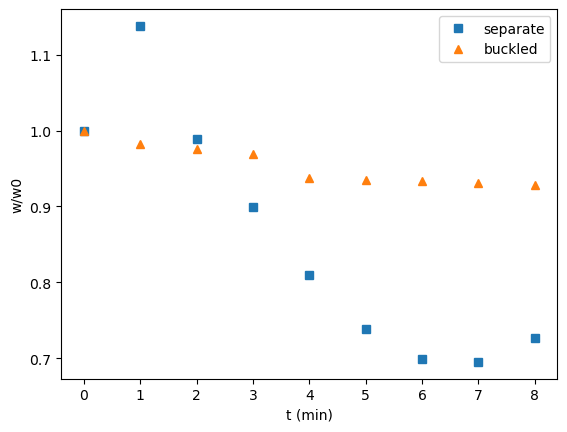

In [264]:
#plot the evolution of roughening normalized to its initial value
tiempo=np.linspace(0,8,9)
array_w=array_w/w_0min
array2_w=array2_w/w2_0min
plt.plot(tiempo,array_w,'s',label='separate')
plt.plot(tiempo,array2_w, '^',label='buckled')
plt.xlabel('t (min)')
plt.ylabel('w/w0')
plt.legend()
plt.savefig('roughening evolution.png')


In [265]:
#calculate the energies as explained in tfg
energies = - np.log(relative_frequencies)
energies2 = - np.log(relative_frequencies2)
r=np.linspace(197,203,26)
r2=np.linspace(172,186,46)

C:\Users\sisni\AppData\Local\Temp\ipykernel_2272\1874055962.py:2: RuntimeWarning: divide by zero encountered in log
  energies = - np.log(relative_frequencies)
C:\Users\sisni\AppData\Local\Temp\ipykernel_2272\1874055962.py:3: RuntimeWarning: divide by zero encountered in log
  energies2 = - np.log(relative_frequencies2)


Text(0, 0.5, 'energia (kT)')

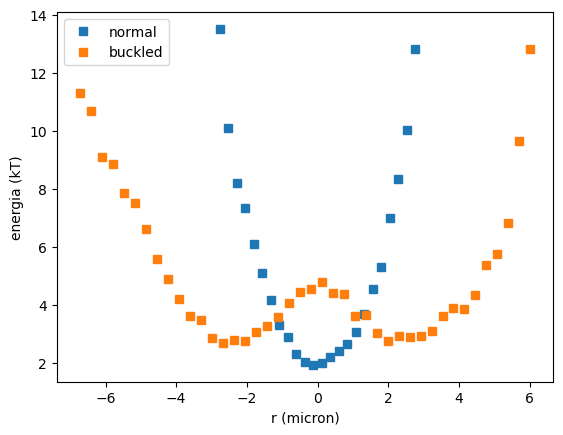

In [267]:
#center the r values to its circle radious
r0=r-radious
r20=r2-radious2
plt.plot(r0, energies, 's', label="normal")
plt.plot(r20,energies2,'s', label="buckled")
plt.legend()
plt.xlabel('r (micron)')
plt.ylabel('energia (kT)')

In [268]:
#define the energies and r coordinates of individual wells at bucled ring
energies2_1pozo=np.array([5.57301224,  4.89049484,  4.18600129, 3.6177248 ,  3.47867326,  2.8377142 ,  2.66913198,  2.77332974, 2.73916659,  3.04742698,  3.25824361,  3.56472605,  4.04299   ,4.41863638,  4.55097397])
energies2_2pozo=np.array([4.77531132,  4.41311493,  4.36068732, 3.5968426 ,  3.63713691,  3.00974613,  2.73121263,  2.90937471, 2.87328813,  2.90337257,  3.09190612,  3.60542377,  3.87237817, 3.86118597,  4.34293162,  5.3732217 ,  5.72817897])
r20_1pozo=r20[(r20<0) & (r20>-4.8)]   
r20_2pozo=r20[(r20>0) & (r20<5.2)]  

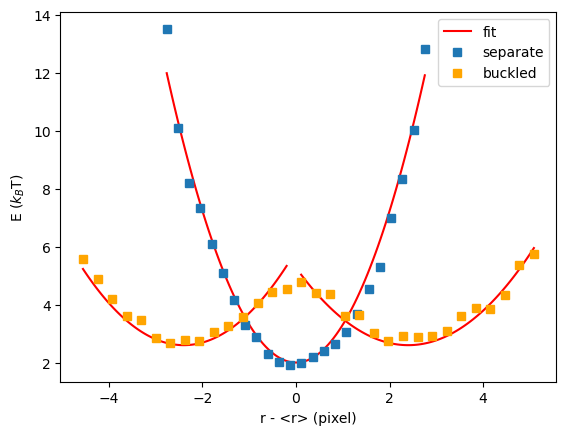

k = 2.61 ± 0.06 pN/pixel
k1 = 1.13 ± 0.06 pN/pixel
k2 = 0.93 ± 0.04 pN/pixel


In [269]:
from scipy.optimize import curve_fit
#deine the fit functions
def fit1(x, k):
    return 0.5 * k * (x+2.4)**2+2.6
def fit2(x, k):
    return 0.5 * k * (x-2.4)**2+2.6
def fit(x, k):
    return 0.5 * k * x**2+2

#fit to the data and extract k value with its error
mask = np.isfinite(r0) & np.isfinite(energies)
r0 = r0[mask]
energies = energies[mask]
popt, pcov = curve_fit(fit, r0, energies)
k = popt[0]
x_fit = np.linspace(min(r0), max(r0), 100)
y_fit = fit(x_fit, k)
k_err = np.sqrt(pcov[0, 0])

popt1, pcov1 = curve_fit(fit1, r20_1pozo, energies2_1pozo)
k1 = popt1[0]
x_fit1 = np.linspace(min(r20_1pozo), max(r20_1pozo), 100)
y_fit1 = fit1(x_fit1, k1)
k1_err = np.sqrt(pcov1[0, 0])

popt2, pcov2 = curve_fit(fit2, r20_2pozo, energies2_2pozo)
k2 = popt2[0]
x_fit2 = np.linspace(min(r20_2pozo), max(r20_2pozo), 100)
y_fit2 = fit2(x_fit2, k2)
k2_err = np.sqrt(pcov2[0, 0])

#plot
plt.plot(x_fit, y_fit, color='red', label='fit')
plt.plot(r0, energies, 's', label="separate")
plt.plot(x_fit1, y_fit1, color='red')
plt.plot(r20_1pozo, energies2_1pozo, 's',color="orange")
plt.plot(x_fit2, y_fit2, color='red')
plt.plot(r20_2pozo, energies2_2pozo, 's',color="orange", label="buckled")
plt.legend()
plt.xlabel('r - <r> (pixel)')
plt.ylabel('E ($k_{\t{B}}$T)')
plt.savefig("energia_normal_buckled.png")
plt.show()
print(f"k = {k:.2f} ± {k_err:.2f} pN/pixel")
print(f"k1 = {k1:.2f} ± {k1_err:.2f} pN/pixel")
print(f"k2 = {k2:.2f} ± {k2_err:.2f} pN/pixel")